# K-Means Clustering - U.S. Crime Data

We'll use k-means to discover clusters in a data set using unsupervised learning. The original data can be found here<br>
https://edureka.wistia.com/medias/eea6j441fs/download?media_file_id=76016491<br>
The material contains statistics of crimes committed in the US in 1973. The data is divided into three main crime categories; murder, assault and rape and shows number of arrests in each crime type per 100,000 residents in each of the 50 states. <br><br>
The analysis consists of the following steps.

- I. Importing necessary libraries and downloading the data
- II. Viewing the data statewise from different angles
- III. Finding out the optimal number of clusters for the data
- IV. Comparing and analysing the different crime categories pairwise
- V. Presenting findings and drawing conclusions

In [1]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns

df = pd.read_csv("C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Crime data/crime_data_2.csv")

df.head()

,State,UrbanPop,Murder,Assault,Rape,Total
0,Alabama,58,13.2,236,21.2,270.4
1,Alaska,48,10.0,263,44.5,317.5
2,Arizona,80,8.1,294,31.0,333.1
3,Arkansas,50,8.8,190,19.5,218.3
4,California,91,9.0,276,40.6,325.6


#columns from csv-file into numpy arrays:

csv = np.genfromtxt ('C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/Crime data/crime_data_2.csv', delimiter=",")

State = csv[:,0]
UrbanPop = csv[:,1]
Murder = csv[:,2]
Assault =csv[:,3]
Rape = csv[:,4]


Next we view the number of total arrests for these crimes and the number of urban population in each state.

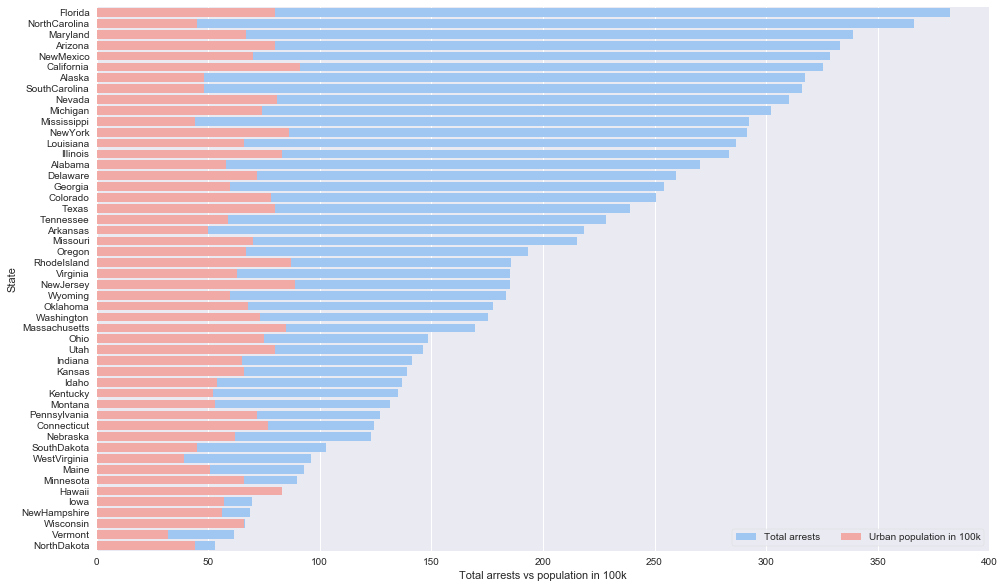

In [4]:
# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values("Total", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="State", data=stats,
            label="Total arrests", color="b")

# Plot the population
sns.barplot(x="UrbanPop", y="State", data=stats,
            label="Urban population in 100k", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total arrests vs population in 100k");

Next we view the number of different crime types in each state.

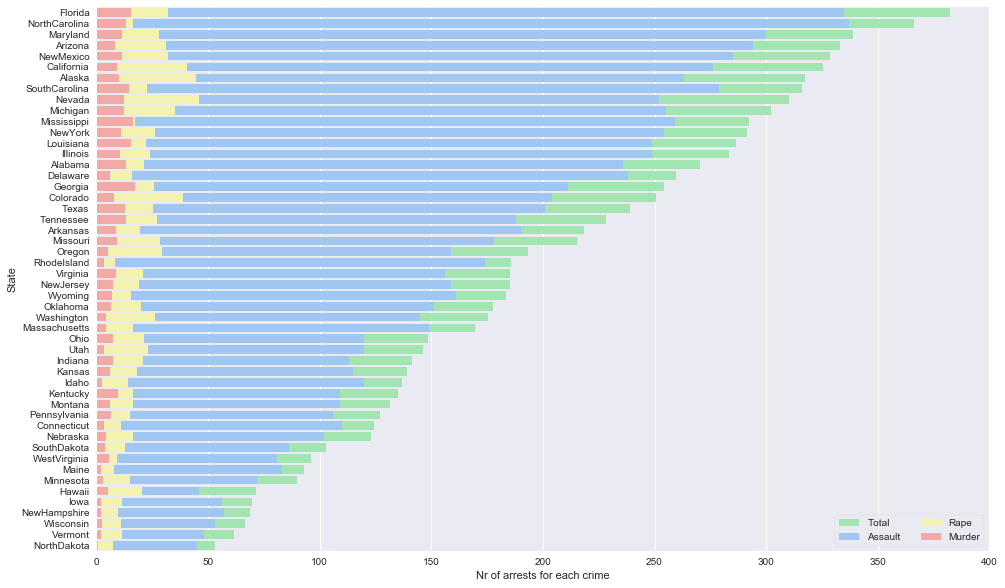

In [5]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

### Finding out the optimal number of clusters
We start by using all 4 variables, excluding variable Total.

In [6]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,cluster_errors,num_clusters
0,200.000000,1
1,104.961633,2
2,80.085695,3
3,57.554259,4
4,49.993843,5
5,44.975637,6
6,40.503768,7
7,35.932422,8
8,33.052915,9
9,27.184805,10


Next, we choose the optimal number of clusters using the elbow method by plotting the above table:

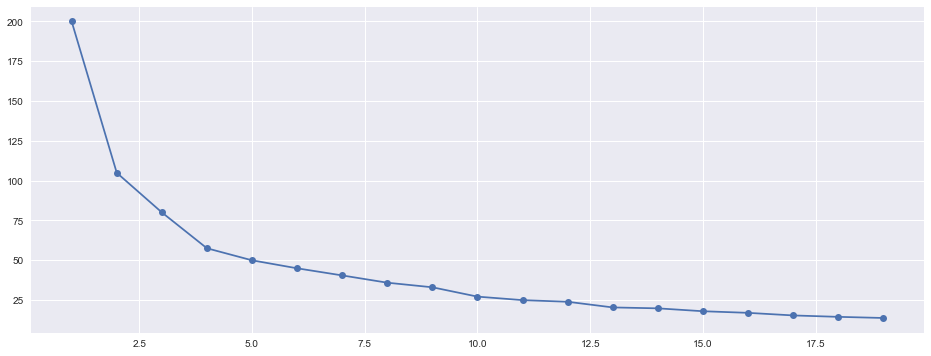

In [7]:
plt.figure(figsize=(16,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

The kinks appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4. 
<br><br> Next, we divide the data into the chosen number of clusters. 

In [8]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_

df['Crime_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


**Please note!** We chose not to normalize the data since it was on the "same scale" already. <br>


### Analysing the data pairwise - UrbanPop & Total
We start by looking at the two main variables until digging into separate crime types.

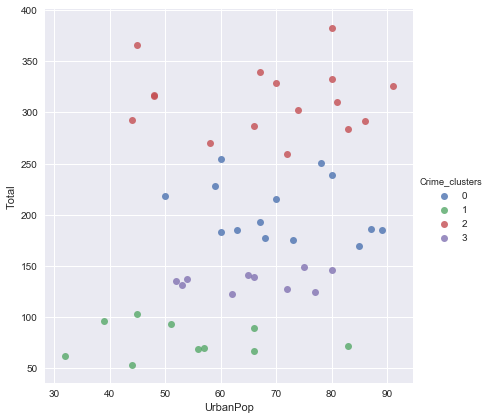

In [269]:
sns.lmplot('UrbanPop' ,'Total', data=df,
        hue = "Crime_clusters",
        fit_reg=False, size = 6 );

It can rather clearly be seen that the size of the urban population does not correlate with the total crime rate. In all sizes of populations there are both high and low crime rates among all four clusters. 

###  Analysing the data pairwise - Murder & Assault
Next up, these two:

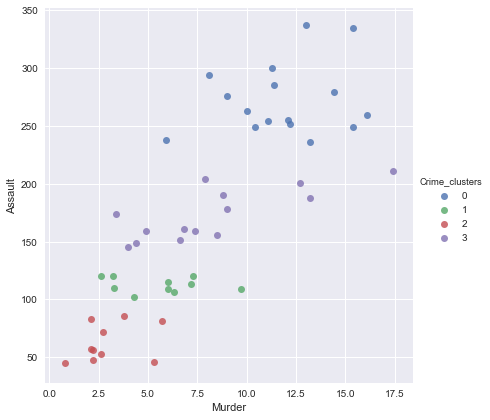

In [9]:
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

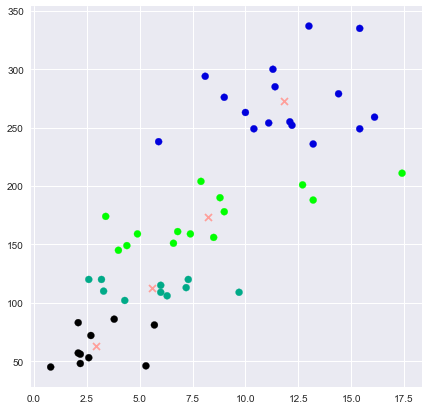

In [10]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,1], c=[plt.cm.spectral(float(i) /5) for i in clusters.labels_]); 
#print(data)
#print(centers)

Analysing these two variables shows a clearer connection between them. Higher murder rates in a state go hand in hand with higher assault rates, and vice versa.<br>
The second graph shows also the centers of the four clusters as x's. The clarity of the clustering is satisfactory, although some outliers remain. The three states in cluster 3 placed between 12.5 and 17.5 on the x-axis (Georgia, Tennessee and Texas) look more like they should belong to cluster 4. Whereas the state placed roughly on nr 6.0 on the x-axis (Delaware), although belonging to cluster 4, looks mor like cluster 3 -material. 

### Analysing the data pairwise - Murder & Rape


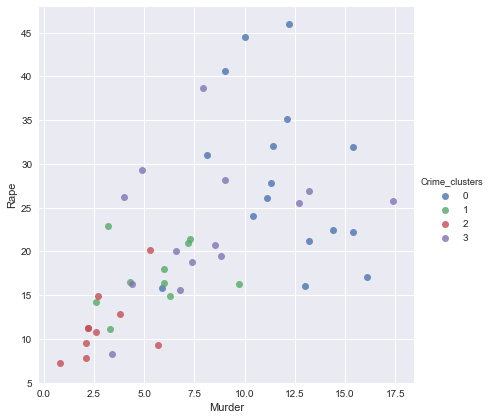

In [11]:
sns.lmplot( 'Murder','Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

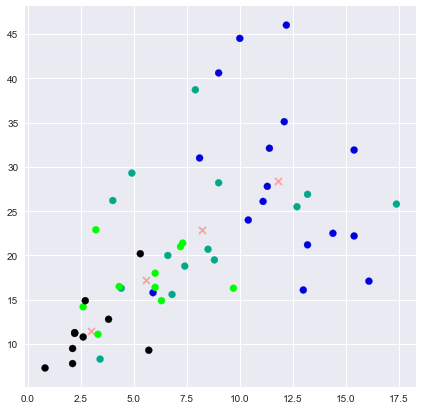

In [12]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,2], marker="x", color='r')
plt.scatter(data.iloc[:,0],data.iloc[:,2], c=[plt.cm.spectral(float(i) /5) for i in clusters.labels_]); 

Contrary to murders vs. assaults, there is much more spread among the clusters when comparing murders vs. rapes. Some correlation is visible, though; low murder rates in a state seem to indicate lower number of rapes, as well. For the higher rate states, the differences are more scattered.

###  Analysing the data pairwise - Assault & Rape

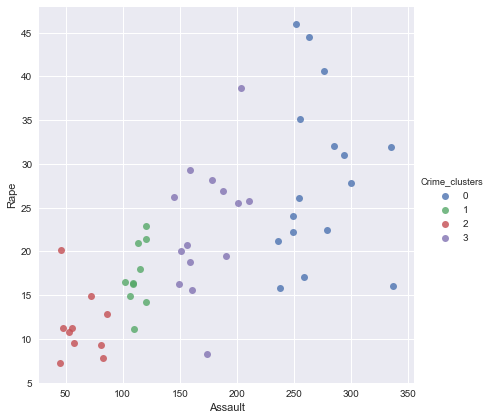

In [13]:
sns.lmplot( 'Assault','Rape',  data=df,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

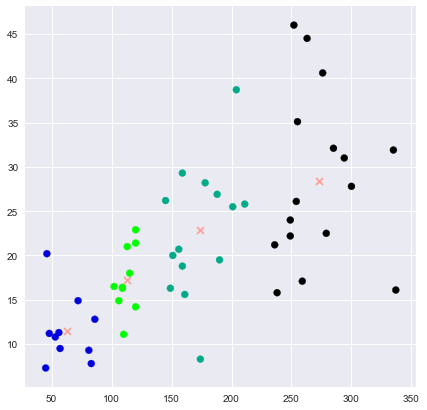

In [14]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

data=X
clusters = KMeans(4);
clusters.fit(X);
plt.figure(figsize=(7, 7))
clusters.labels_;
centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,1], centers[:,2], marker="x", color='r')
plt.scatter(data.iloc[:,1],data.iloc[:,2], c=[plt.cm.spectral(float(i) /5) for i in clusters.labels_]); 

As with murder and assault, also rates of rape and assault show clearer correlations.
<br> Perhaps a quick correlation analysis will confirm the assumptions from these visual comparisons:

In [255]:
variables_correlation = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
variables_correlation.corr() 

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


This is interesting! The table quite well confirms the assumptions regarding variable correlations indicated also by the graphs. For example, murder and assault have the highest correlations, whereas the size of urban population is not significant. 
<br><br>
Next, let's sort the data according to the four clusters.

In [15]:
stats = df.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

df_total.head()

,State,UrbanPop,Murder,Assault,Rape,Total,Crime_clusters
33,NorthDakota,44,0.8,45,7.3,53.1,2
44,Vermont,32,2.2,48,11.2,61.4,2
48,Wisconsin,66,2.6,53,10.8,66.4,2
28,NewHampshire,56,2.1,57,9.5,68.6,2
14,Iowa,57,2.2,56,11.3,69.5,2


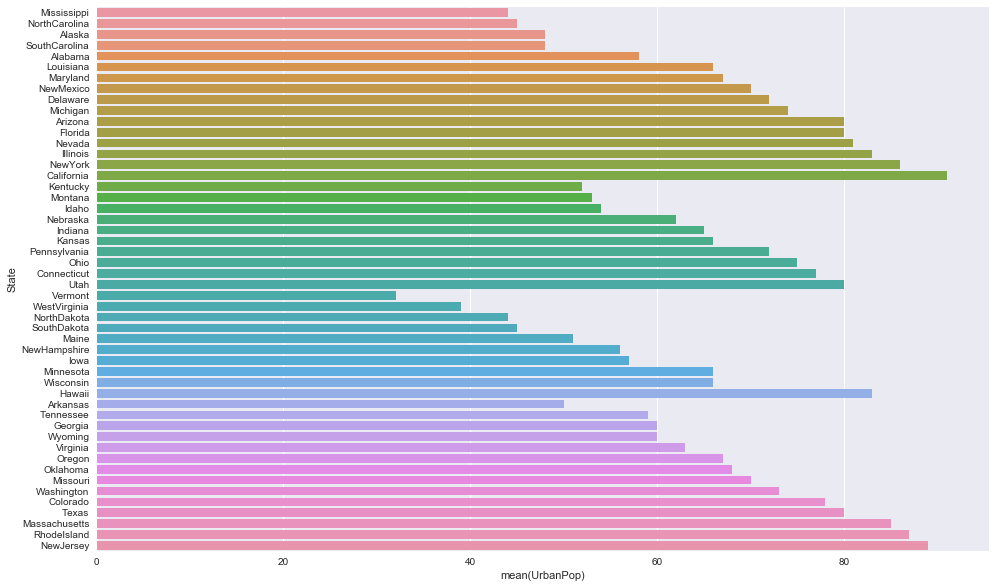

In [16]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = df.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="State", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)

**Cluster 1:** Arkansas, Tennessee,...,Rhode Island, New Jersey<br>
**Cluster 2:** Vermont, West Virginia,...,Wisconsin, Hawaii<br>
**Cluster 3:** Missisippi, North Carolina,...,New York, California<br>
**Cluster 4:** Kentucky, Montana,...,Connecticut, Utah

## Conclusions
There are no *clear and conclusive* differences between the four clusters that could be based on the available variables. For example, a large urban population does not automatically lead to higher crime rates. Hawaii, for example, ranks as 6th in urban population but is 45th in the total crime rate. North Carolina, on the other hand, had the second highest crime rate but ranks only as 45th in urban population.
<br><br>Digging deeper into possible socio-economic and demograhpic causalities would require a wider set of variables, not only relating to the number of arrests in each crime type. However, there were some clear correlations between certain crime types, the investigation of which could be interesting.